<h1 align="center">Heart Attack - EDA</h1>

1. [Introduction](#1)
    - 1.1 [Data Dictionary](#2)
    - 1.2 [Task](#3)
    - 1.3 [Understanding Data](#21)
2. [Preparation](#4)
    - 2.1 [Packages](#5)
    - 2.2 [Data](#6)
    - 2.3 [Understanding Data](#7)
3. [Exploratory Data Analysis](#8)
    - 3.1 [Univariate Analysis](#9)
    - 3.2 [Bivariate Analysis](#10)
4. [Data Preprocessing](#11)
    - 4.1 [Conclusions from the EDA](#12)
    - 4.2 [Packages](#13)
    - 4.3 [Making features model ready](#14)
5. [Modeling](#15)
    - 5.1 [Linear Classifiers](#16)
    - 5.2 [Tree Models](#17)
    

### 1. Introduction <a id=1></a>

#### 1.1 Data Dictionary <a id=2></a>
`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`chol` - Cholestoral in mg/dl fetched via BMI sensor

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`caa` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`output` - Target variable

**Additional Variables Explaination from Kaggle**

**age** - age in years

**sex** - sex (1 = male; 0 = female)

**cp** - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)

**chol** - serum cholestoral in mg/dl

**fbs** - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

**restecg** - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

**thalach** - maximum heart rate achieved

**exang** - exercise induced angina (1 = yes; 0 = no)

**oldpeak** - ST depression induced by exercise relative to rest

**slope** - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

**ca** - number of major vessels (0-3) colored by flourosopy

**thal** - 2 = normal; 1 = fixed defect; 3 = reversable defect

**num** - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)

    Variable definition can be found in the discussion section

#### 1.2 Task <a id=3></a>
To perform EDA and predict if a person is prone to a heart attack or not.

#### 1.3 Understanding Data <a id=21></a>
* What is Heart Attack?





* How does it Happen?




* What are the most contributing Factors for heart attack to happen ?



* symptoms of heart attack for male and female?


### 2. Preparation <a id=4></a>

### 2.1 Packages <a id=5></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set() 

### 2.2 Data <a id=6></a>

In [240]:
cleveland=pd.read_csv("processed.cleveland.data",header=None)
hungarian=pd.read_csv("processed.hungarian.data",header=None)
switzerland=pd.read_csv("processed.switzerland.data",header=None)
va=pd.read_csv("processed.va.data",header=None)

In [17]:
cleveland.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [18]:
hungarian.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [19]:
switzerland.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,32,1,1,95,0,?,0,127,0,.7,1,?,?,1
1,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
2,35,1,4,?,0,?,0,130,1,?,?,?,7,3
3,36,1,4,110,0,?,0,125,1,1,2,?,6,1
4,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2


In [20]:
va.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [241]:
column_names  = {0:'age',1:'sex',2:'cp',3:'trestbps',4:'chol',5:'fbs',6:'restecg',7:'thalach',8:'exang',9:'oldpeak',10:'slope',11:'ca',12:'thal',13:'target'}

In [242]:
df = pd.concat([cleveland,hungarian,va,switzerland])
df.rename(columns=column_names,inplace=True)

### 2.3 Understanding Data <a id=7></a>

#### 2.3.1 The shape of the data

In [25]:
df.shape

(920, 14)

#### 2.3.3 Preview of the first 5 rows of the data

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 122
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    object 
 4   chol      920 non-null    object 
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    object 
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    object 
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  target    920 non-null    int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 107.8+ KB


In [29]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [219]:
# add location to dataset:
def add_location(df , place):
        df['place'] = place

In [220]:
add_location(cleveland,'clev')
add_location(hungarian, 'hun')
add_location(switzerland, 'sw')
add_location(va , 'va')

### 2.3.2 Concating all dataframes together:

In [221]:
df=pd.concat([cleveland,hungarian,switzerland,va],ignore_index=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,place
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,clev
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,clev
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,clev
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,clev
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,clev


In [222]:
pd.set_option('display.max_columns', None)
df.rename(columns=column_names,inplace=True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,place
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,clev
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,clev
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,clev
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,clev
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,clev
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127,333,1,1,154,0,0,?,?,?,1,va
916,62.0,1.0,1.0,?,139,0,1,?,?,?,?,?,?,0,va
917,55.0,1.0,4.0,122,223,1,1,100,0,0,?,?,6,2,va
918,58.0,1.0,4.0,?,385,1,2,?,?,?,?,?,?,0,va


#### 2.3.3 Checking the number of unique values in each column

In [275]:
df.nunique()

age          50
sex           2
cp            4
trestbps    103
chol        336
fbs           5
restecg       7
thalach     198
exang         5
oldpeak      82
slope         7
ca            8
thal          7
target        5
dtype: int64

In [35]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
sex,920.0,NaN,NaN,NaN,0.78913,0.408148,0.0,1.0,1.0,1.0,1.0
cp,920.0,NaN,NaN,NaN,3.25,0.930969,1.0,3.0,4.0,4.0,4.0
trestbps,920,103,120,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,920.0,336.0,0.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,920,5,0,434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,920,7,0,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,920,198,?,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exang,920,5,0,324,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,920.0,82.0,0.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#duplicated values:
df.duplicated().any()

True

#### 2.3.4 Separating the columns in categorical and continuous

In [223]:
numeric_var = df[["age","trestbps","chol","thalach","oldpeak"]]
categorical_var = df[["sex","cp","fbs","restecg","exang","slope","ca","thal","target"]]

In [81]:
numeric_var

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...
915,54.0,127,333,154,0
916,62.0,?,139,?,?
917,55.0,122,223,100,0
918,58.0,?,385,?,?


#### 2.3.5 Summary statistics

In [240]:
df[numeric_var].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,920.0,NaN,NaN,NaN,53.51087,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,920,103,120,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chol,920.0,336.0,0.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
thalach,920,198,?,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,920.0,82.0,0.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2.3.6 Missing values

In [244]:
df = df.replace('?', np.NaN)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [42]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
place         0
dtype: int64

In [245]:
convert= {'trestbps':float ,'chol': float,'fbs':float,'restecg':float ,'thalach':float ,'exang':float ,'oldpeak':float,'ca':float,'slope':float,'thal':float
                ,}
df=df.astype(convert)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
 14  place     920 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 107.9+ KB


<AxesSubplot:>

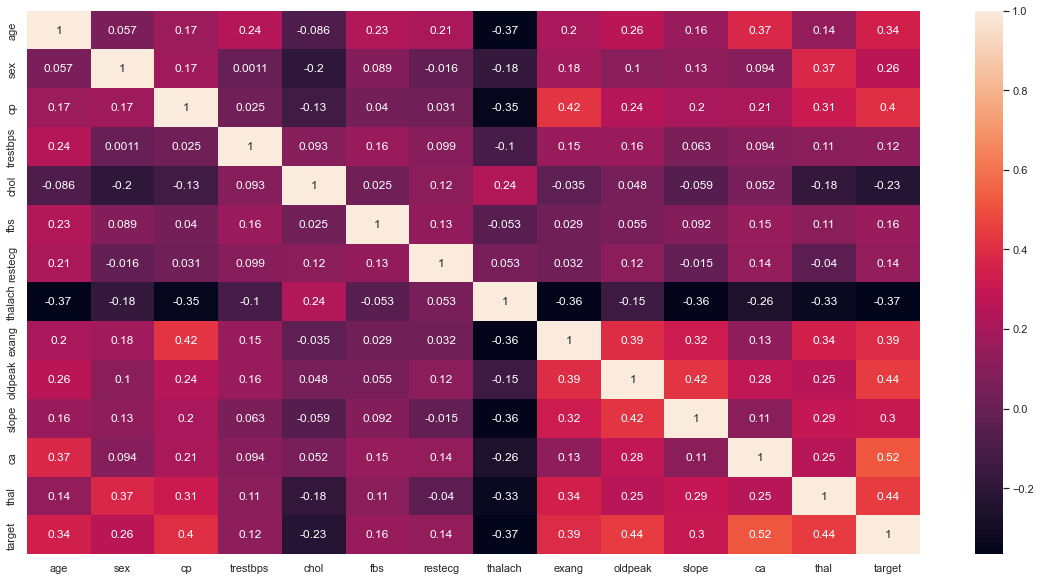

In [94]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True )

### The first way to fill missing values:

In [215]:
pip install fancyimpute

  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=89716efcbfbe538f6b3bc8c43ef979cec1222e9813a82df399738f8f56f57bab
  Stored in directory: c:\users\dream\appdata\local\pip\cache\wheels\f9\fc\6a\b0406b906bce293abe23c3b6da5a72637d2d04146ef1125a0b
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=21d47de5f4628157c221f42dee8a109faa3579e9cdcb214d21796c7664163e63
  Stored in directory: c:\users\dream\appdata\local\pip\cache\wheels\88\c4\be\e232c750d9bc360abf9a5e2cafe0d3e08e3605d2801bb11684
Successfully built fancyimpute knnimpute
Note: you may need to restart the kernel to use updated packages.


In [246]:
knn_fancy_imputer =df.copy(deep=True)
knn_fancy_imputer

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,NaN,7.0,1
119,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,NaN,7.0,3
120,72.0,1.0,3.0,160.0,0.0,NaN,2.0,114.0,0.0,1.6,2.0,2.0,NaN,0
121,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,NaN,3.0,1


In [248]:
from fancyimpute import KNN
knn_1 = KNN()

In [249]:
knn_fancy_imputer.iloc[:,:]= knn_1.fit_transform(knn_fancy_imputer)

Imputing row 1/920 with 0 missing, elapsed time: 0.319
Imputing row 101/920 with 0 missing, elapsed time: 0.322
Imputing row 201/920 with 0 missing, elapsed time: 0.323
Imputing row 301/920 with 0 missing, elapsed time: 0.323
Imputing row 401/920 with 4 missing, elapsed time: 0.332
Imputing row 501/920 with 2 missing, elapsed time: 0.343
Imputing row 601/920 with 2 missing, elapsed time: 0.350
Imputing row 701/920 with 2 missing, elapsed time: 0.361
Imputing row 801/920 with 2 missing, elapsed time: 0.374
Imputing row 901/920 with 1 missing, elapsed time: 0.381


In [247]:
knn_fancy_imputer.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [250]:
knn_fancy_imputer

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.000000,2.0,150.0,0.0,2.3,3.0,0.000000,6.000000,0.0
1,67.0,1.0,4.0,160.0,286.0,0.000000,2.0,108.0,1.0,1.5,2.0,3.000000,3.000000,2.0
2,67.0,1.0,4.0,120.0,229.0,0.000000,2.0,129.0,1.0,2.6,2.0,2.000000,7.000000,1.0
3,37.0,1.0,3.0,130.0,250.0,0.000000,0.0,187.0,0.0,3.5,3.0,0.000000,3.000000,0.0
4,41.0,0.0,2.0,130.0,204.0,0.000000,2.0,172.0,0.0,1.4,1.0,0.000000,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115.0,0.0,0.000000,1.0,92.0,1.0,0.0,2.0,1.710903,7.000000,1.0
119,70.0,1.0,4.0,140.0,0.0,1.000000,0.0,157.0,1.0,2.0,2.0,0.625982,7.000000,3.0
120,72.0,1.0,3.0,160.0,0.0,0.170275,2.0,114.0,0.0,1.6,2.0,2.000000,5.841739,0.0
121,73.0,0.0,3.0,160.0,0.0,0.000000,1.0,121.0,0.0,0.0,1.0,1.624806,3.000000,1.0


In [253]:
knn_fancy_imputer.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [129]:
numeric_var.head()

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4


In [127]:
numeric_var.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   trestbps  861 non-null    float64
 2   chol      890 non-null    float64
 3   thalach   865 non-null    float64
 4   oldpeak   858 non-null    float64
dtypes: float64(5)
memory usage: 36.1 KB


In [134]:
numeric_var.isnull().sum()

age          0
trestbps    59
chol        30
thalach     55
oldpeak     62
dtype: int64

<AxesSubplot:>

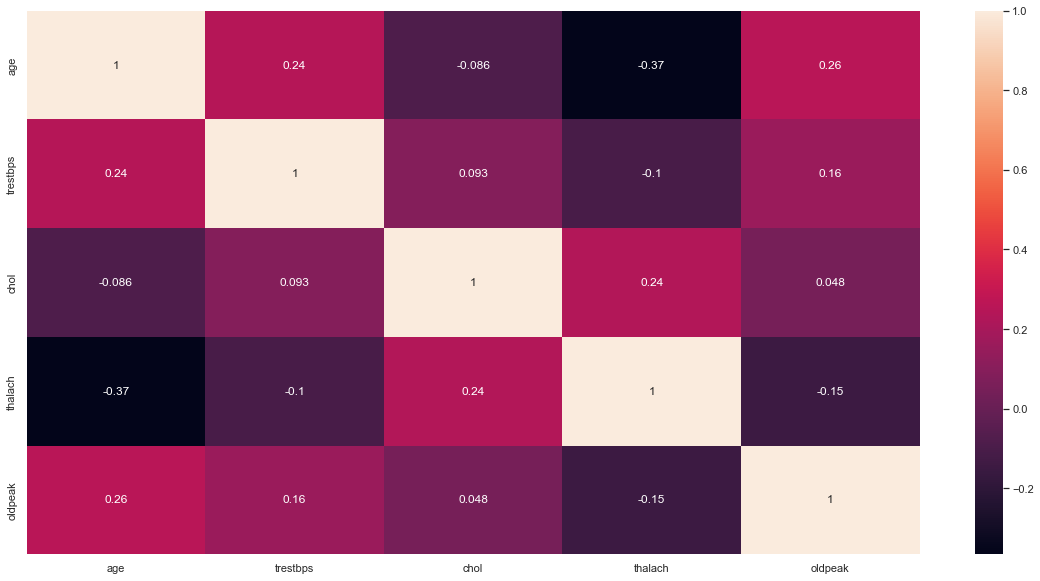

In [119]:
plt.figure(figsize=(20,10))
sns.heatmap(numeric_var.corr(),annot=True )

In [120]:
numeric_var.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
thalach,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2


In [135]:
s=numeric_var.interpolate()
s

,age,trestbps,chol,thalach,oldpeak
0,63.0,145.0,233.0,150.0,2.3
1,67.0,160.0,286.0,108.0,1.5
2,67.0,120.0,229.0,129.0,2.6
3,37.0,130.0,250.0,187.0,3.5
4,41.0,130.0,204.0,172.0,1.4
...,...,...,...,...,...
915,54.0,127.0,333.0,154.0,0.0
916,62.0,124.5,139.0,127.0,0.0
917,55.0,122.0,223.0,100.0,0.0
918,58.0,121.0,385.0,96.5,0.0


In [136]:
s.isnull().sum()

age         0
trestbps    0
chol        0
thalach     0
oldpeak     0
dtype: int64

In [143]:
s.shape

(920, 5)

<AxesSubplot:>

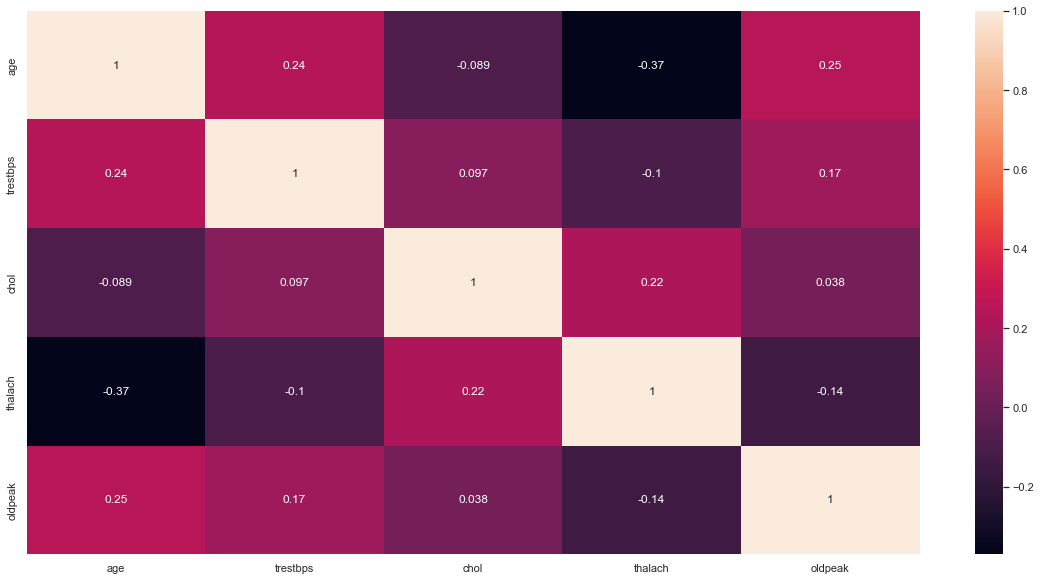

In [137]:
plt.figure(figsize=(20,10))
sns.heatmap(s.corr(),annot=True )

In [138]:
categorical_var.head()

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,6.0,0
1,1.0,4.0,0.0,2.0,1.0,2.0,3.0,3.0,2
2,1.0,4.0,0.0,2.0,1.0,2.0,2.0,7.0,1
3,1.0,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0
4,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,0


In [133]:
categorical_var.isnull().sum()

sex          0
cp           0
fbs         90
restecg      2
exang       55
slope      309
ca         611
thal       486
target       0
dtype: int64

<AxesSubplot:>

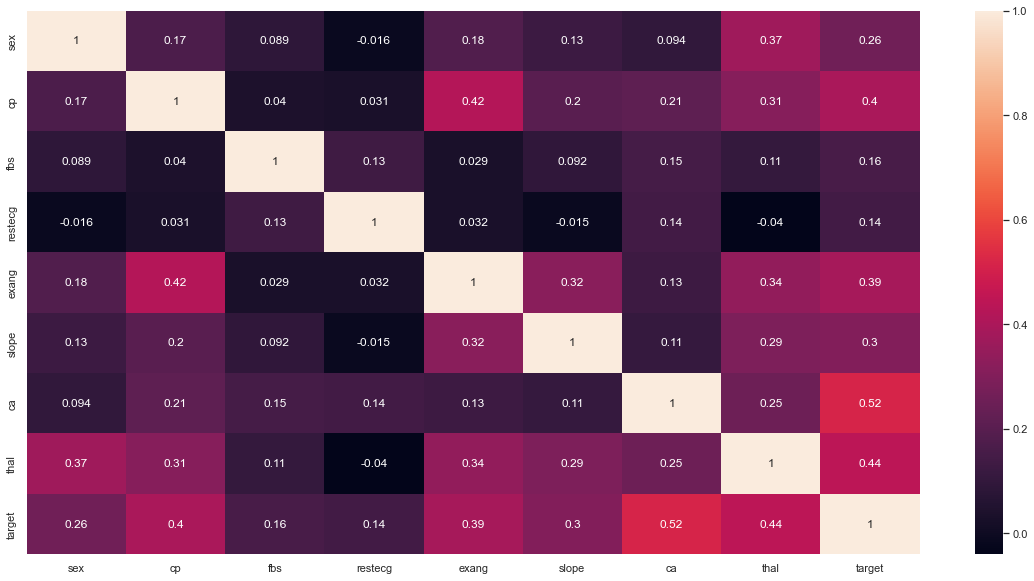

In [146]:
plt.figure(figsize=(20,10))
sns.heatmap(categorical_var.corr(),annot=True )

In [188]:
pip install impyute

Note: you may need to restart the kernel to use updated packages.


In [211]:
import impyute as impy
X_theme = categorical_var[['ca']]
X_rand = categorical_var[['ca']]
df_theme_missing1 = categorical_var.copy()
df_rand_missing1 = categorical_var.copy()
categorical_var[['ca']] = impy.em(df_theme_missing1[['ca']].values, loops=500)


C:\Users\Dream\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [209]:
import impyute as impy
X_theme = categorical_var[['thal']]
X_rand = categorical_var[['thal']]
df_theme_missing1 = categorical_var.copy()
df_rand_missing1 = categorical_var.copy()
categorical_var[['thal']] = impy.em(df_theme_missing1[['thal']].values, loops=1000)

C:\Users\Dream\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [255]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: cycler>=0.10 in c:\users\dream\anaconda3\lib\site-packages (from matplotlib<3.6,>=3.2->pandas_profiling) (0.10.0)

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=b13c322962547a7359609a4bfdab9aea3abc3deae3dd47abe2c07b8d75895ead
  Stored in directory: c:\users\dream\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [256]:
import pandas_profiling as pp

In [ ]:
pp.profileRepoer()